# <center>House Price Prediction</center>

## Modules

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

plt.style.use('ggplot')

## Initialize the dataframe

In [2]:
df = pd.read_csv('house.csv', parse_dates=True)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df.isnull().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.shape

(21613, 22)

## Data Wrangling

In [7]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [9]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## Exploratory Data Analysis

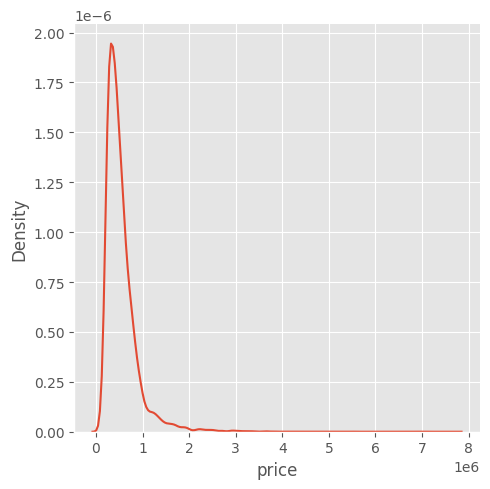

In [20]:
sns.displot(df['price'], kind='kde')
plt.show()

In [11]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

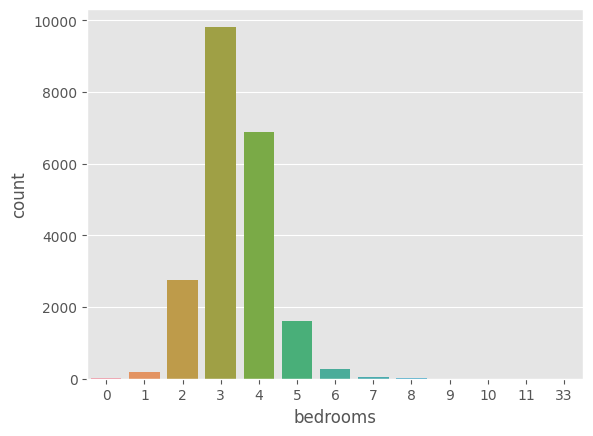

In [21]:
sns.countplot(data=df, x='bedrooms')
plt.show()

In [16]:
df.corr()['price'].sort_values()

zipcode         -0.053203
date            -0.004357
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

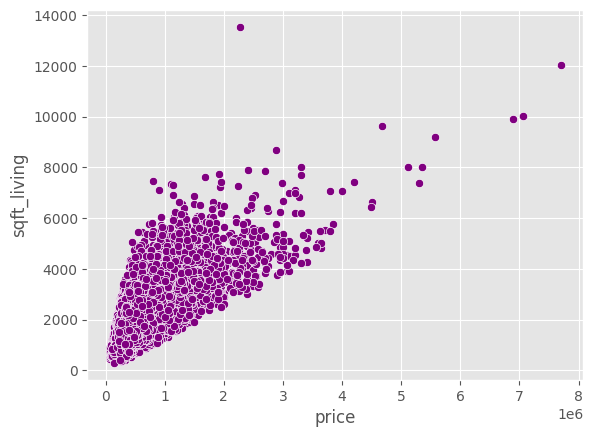

In [22]:
sns.scatterplot(data=df, x='price', y='sqft_living', color='purple')
plt.show()

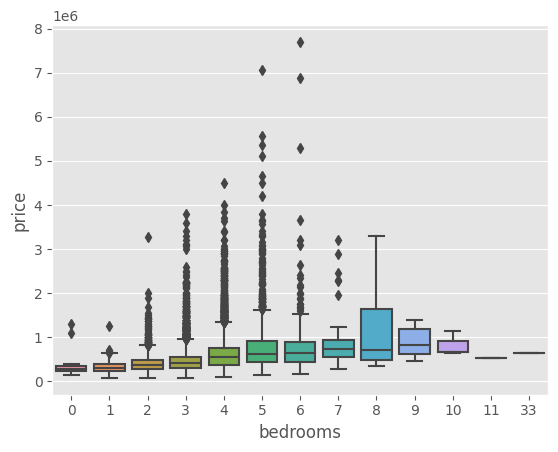

In [23]:
sns.boxplot(data=df, x='bedrooms', y='price')
plt.show()

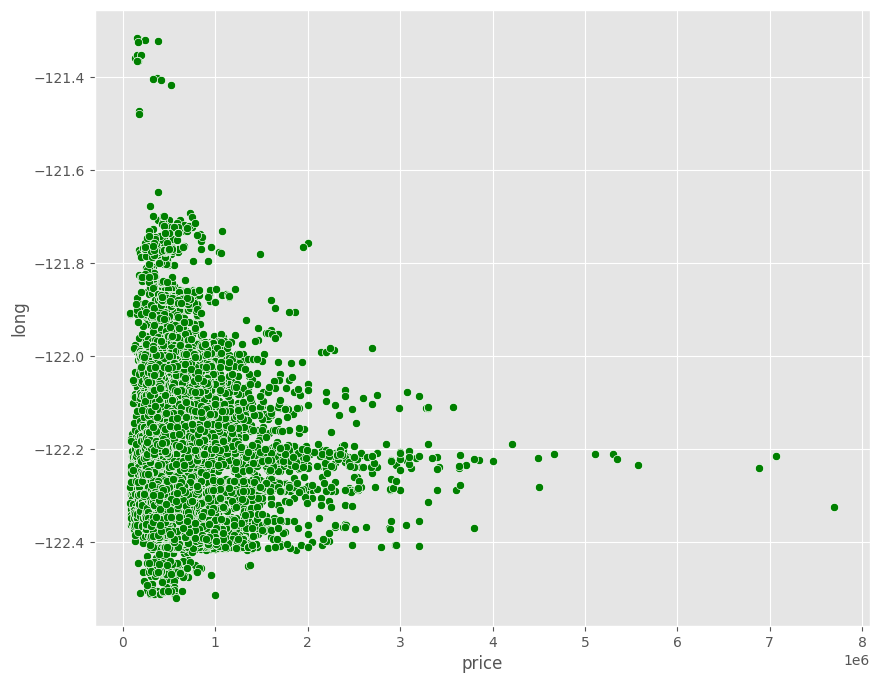

In [27]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='price', y='long', color='green')
plt.show()

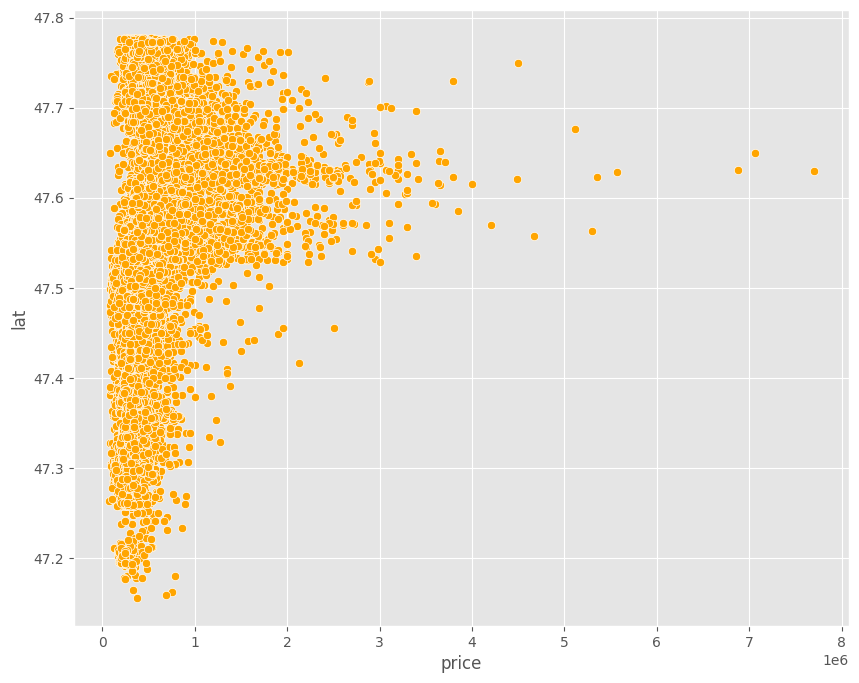

In [28]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='price', y='lat', color='orange')
plt.show()

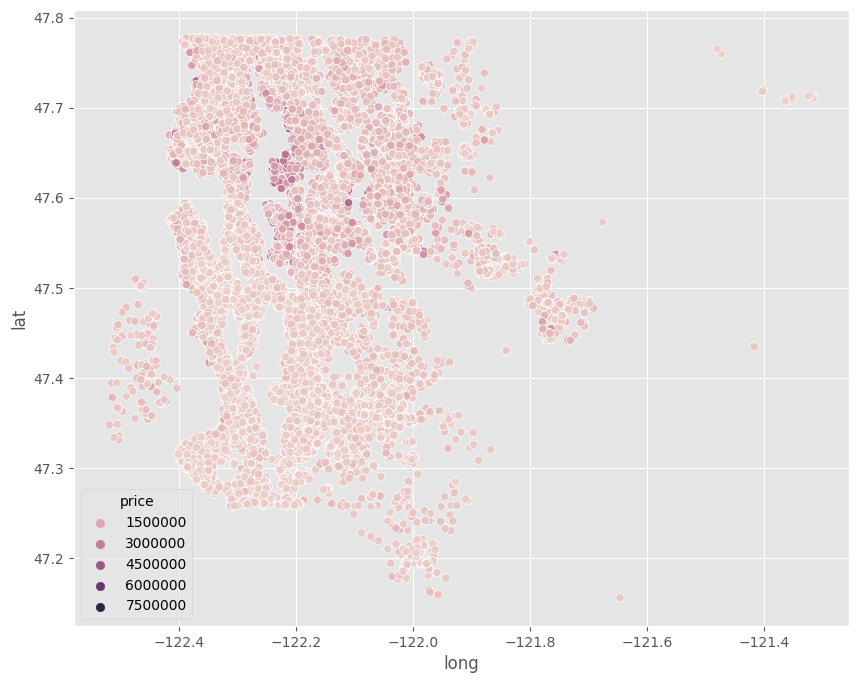

In [35]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')
plt.show()

#### Removing outliers

In [40]:
df.sort_values('price', ascending=False).head(20)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,2015-04-13,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,2014-10-20,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,2014-06-17,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,2014-08-15,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,2014-06-18,4489000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [41]:
len(df)*0.01

216.13

In [44]:
bottom99 = df.sort_values('price', ascending=False).iloc[220:]
bottom99.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9175,2015-02-13,1955000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
19351,2014-07-25,1950000.0,4,3.50,4065,18713,2.0,0,0,4,10,4065,0,1987,0,98039,47.6209,-122.237,3070,18713
11871,2015-01-12,1950000.0,4,3.25,7420,167869,2.0,0,3,3,12,7420,0,2002,0,98045,47.4548,-121.764,5610,169549
15377,2015-04-08,1950000.0,4,2.50,3440,14554,2.0,1,4,3,8,2170,1270,2012,0,98155,47.7364,-122.286,3170,11810
556,2014-06-20,1950000.0,7,3.50,4640,15235,2.0,0,1,3,11,2860,1780,1965,2003,98040,47.5666,-122.231,3230,20697


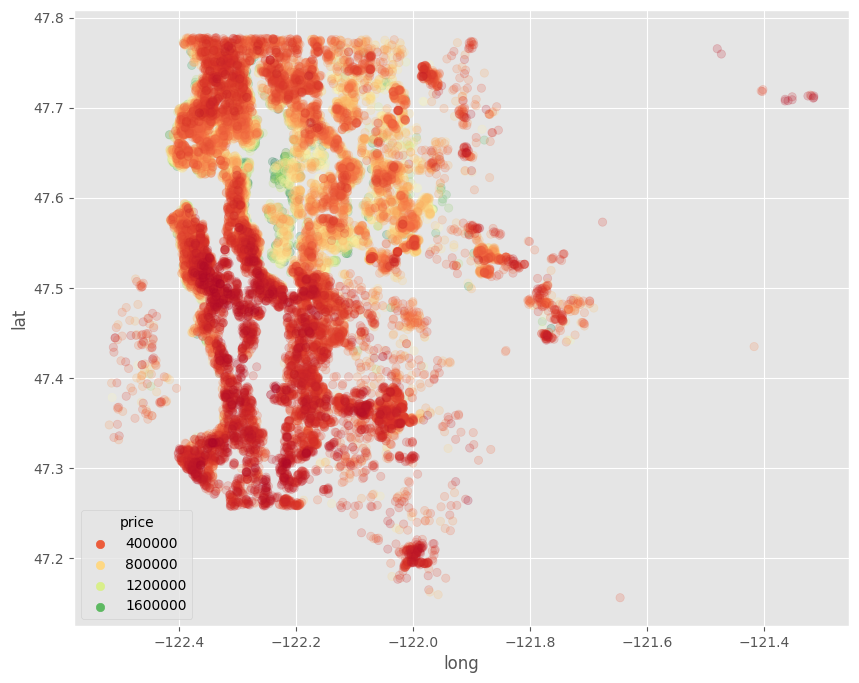

In [49]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', data=bottom99, hue='price', edgecolor=None, alpha=0.2, palette='RdYlGn')
plt.show()

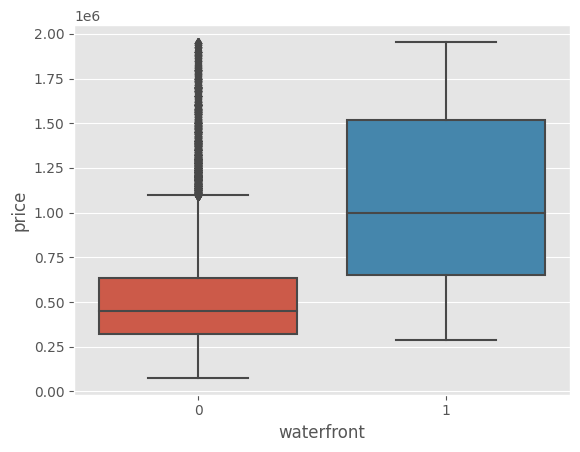

In [52]:
sns.boxplot(data=bottom99, x='waterfront', y='price')
plt.show()

## Feature Engineering

In [56]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [58]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [61]:
df.drop('date', axis=1, inplace=True)

In [62]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


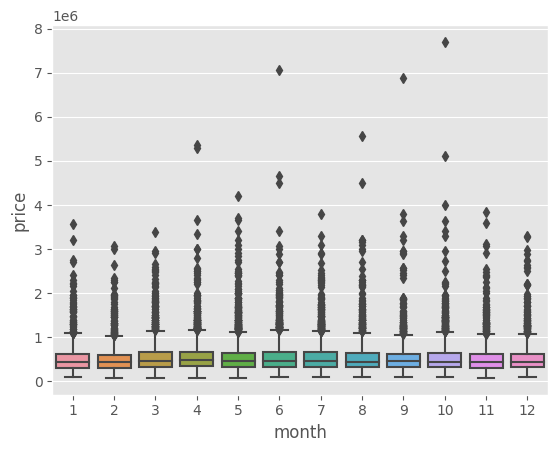

In [64]:
sns.boxplot(x='month', y='price', data=df)
plt.show()

<Axes: xlabel='month'>

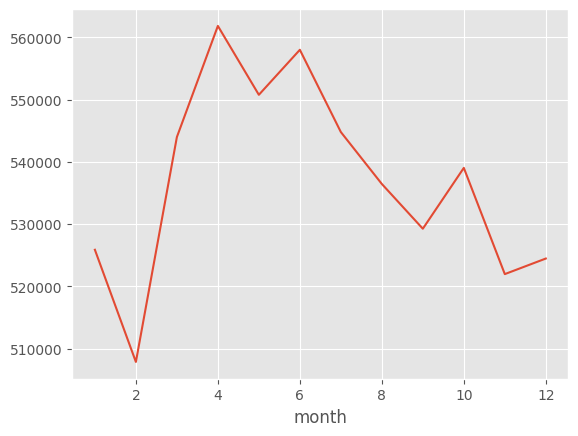

In [66]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

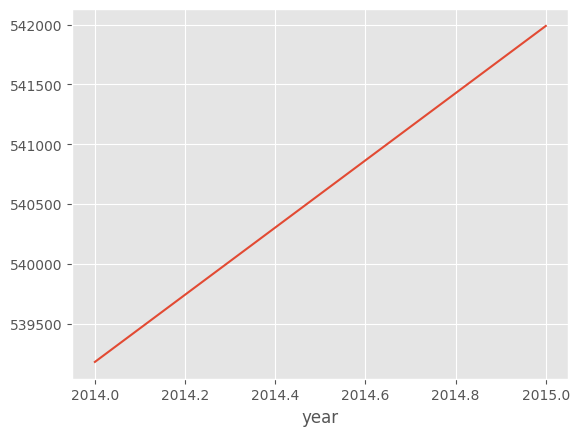

In [67]:
df.groupby('year').mean()['price'].plot()

In [70]:
df.drop('zipcode', axis=1, inplace=True)

In [71]:
df['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [73]:
df['sqft_basement'].value_counts()

sqft_basement
0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

## Model Training

In [75]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [80]:
scaler = MinMaxScaler()

In [81]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [84]:
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test, y_test),
          batch_size=128,
          epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 5ms/step - loss: 423630110720.0000 - val_loss: 433035706368.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 423019380736.0000 - val_loss: 430879965184.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 413909188608.0000 - val_loss: 408837554176.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 363814453248.0000 - val_loss: 319616581632.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 236190760960.0000 - val_loss: 166284754944.0000
Epoch 6/400
119/119 [==============================] - 0s 4ms/step - loss: 119836999680.0000 - val_loss: 106122936320.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 98830368768.0000 - val_loss: 103071252480.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 97192280064.0000 - val_loss: 101607456768.0000
Epoch 9/400
119/11

119/119 [==============================] - 0s 3ms/step - loss: 39098896384.0000 - val_loss: 38765416448.0000
Epoch 69/400
119/119 [==============================] - 0s 3ms/step - loss: 38907273216.0000 - val_loss: 38516510720.0000
Epoch 70/400
119/119 [==============================] - 0s 3ms/step - loss: 38723915776.0000 - val_loss: 38318256128.0000
Epoch 71/400
119/119 [==============================] - 0s 3ms/step - loss: 38580211712.0000 - val_loss: 38149005312.0000
Epoch 72/400
119/119 [==============================] - 0s 3ms/step - loss: 38352932864.0000 - val_loss: 37996036096.0000
Epoch 73/400
119/119 [==============================] - 0s 3ms/step - loss: 38197678080.0000 - val_loss: 37850464256.0000
Epoch 74/400
119/119 [==============================] - 0s 3ms/step - loss: 38043332608.0000 - val_loss: 37672865792.0000
Epoch 75/400
119/119 [==============================] - 0s 3ms/step - loss: 37942607872.0000 - val_loss: 37498253312.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 33643378688.0000 - val_loss: 33079918592.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 33621129216.0000 - val_loss: 32974497792.0000
Epoch 137/400
119/119 [==============================] - 0s 3ms/step - loss: 33561956352.0000 - val_loss: 32928598016.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 33538832384.0000 - val_loss: 32906631168.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 33511817216.0000 - val_loss: 32867487744.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 33462638592.0000 - val_loss: 32811382784.0000
Epoch 141/400
119/119 [==============================] - 0s 3ms/step - loss: 33450446848.0000 - val_loss: 32784152576.0000
Epoch 142/400
119/119 [==============================] - 0s 3ms/step - loss: 33398398976.0000 - val_loss: 32739108864.0000
Epoch 143/400
11

119/119 [==============================] - 0s 4ms/step - loss: 31756154880.0000 - val_loss: 31160164352.0000
Epoch 202/400
119/119 [==============================] - 0s 3ms/step - loss: 31764436992.0000 - val_loss: 31123474432.0000
Epoch 203/400
119/119 [==============================] - 0s 3ms/step - loss: 31719698432.0000 - val_loss: 31103924224.0000
Epoch 204/400
119/119 [==============================] - 0s 3ms/step - loss: 31695140864.0000 - val_loss: 31088857088.0000
Epoch 205/400
119/119 [==============================] - 0s 3ms/step - loss: 31666259968.0000 - val_loss: 31067385856.0000
Epoch 206/400
119/119 [==============================] - 0s 3ms/step - loss: 31634468864.0000 - val_loss: 31107407872.0000
Epoch 207/400
119/119 [==============================] - 0s 3ms/step - loss: 31659724800.0000 - val_loss: 31030697984.0000
Epoch 208/400
119/119 [==============================] - 0s 3ms/step - loss: 31617927168.0000 - val_loss: 31011639296.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 30510485504.0000 - val_loss: 29930412032.0000
Epoch 268/400
119/119 [==============================] - 0s 3ms/step - loss: 30474377216.0000 - val_loss: 29911562240.0000
Epoch 269/400
119/119 [==============================] - 0s 3ms/step - loss: 30445848576.0000 - val_loss: 29893326848.0000
Epoch 270/400
119/119 [==============================] - 0s 3ms/step - loss: 30408826880.0000 - val_loss: 29904967680.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 30449999872.0000 - val_loss: 29865066496.0000
Epoch 272/400
119/119 [==============================] - 0s 3ms/step - loss: 30407714816.0000 - val_loss: 29860859904.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 30403966976.0000 - val_loss: 29843720192.0000
Epoch 274/400
119/119 [==============================] - 0s 3ms/step - loss: 30382706688.0000 - val_loss: 29921218560.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 29359452160.0000 - val_loss: 28966414336.0000
Epoch 334/400
119/119 [==============================] - 0s 3ms/step - loss: 29310617600.0000 - val_loss: 28928102400.0000
Epoch 335/400
119/119 [==============================] - 0s 3ms/step - loss: 29325631488.0000 - val_loss: 28928940032.0000
Epoch 336/400
119/119 [==============================] - 0s 3ms/step - loss: 29306468352.0000 - val_loss: 28886046720.0000
Epoch 337/400
119/119 [==============================] - 0s 3ms/step - loss: 29270585344.0000 - val_loss: 28889485312.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 29244061696.0000 - val_loss: 28865456128.0000
Epoch 339/400
119/119 [==============================] - 0s 3ms/step - loss: 29239775232.0000 - val_loss: 28845621248.0000
Epoch 340/400
119/119 [==============================] - 0s 3ms/step - loss: 29254418432.0000 - val_loss: 28845537280.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 28299065344.0000 - val_loss: 28199565312.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 28289507328.0000 - val_loss: 28163534848.0000


In [87]:
losses = pd.DataFrame(model.history.history)

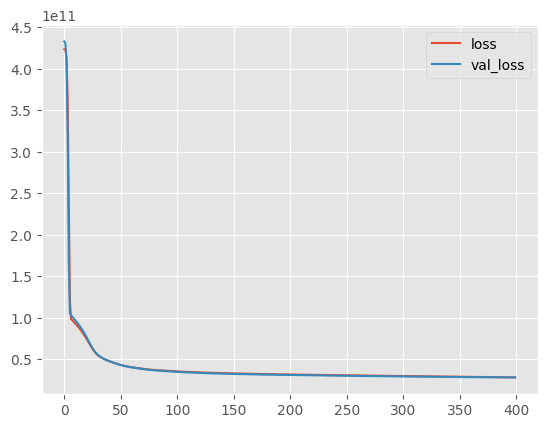

In [89]:
losses.plot()
plt.show()

In [91]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


#### Evaluation

In [93]:
np.sqrt(mean_squared_error(y_test, predictions))

167819.95181104096

In [95]:
mean_absolute_error(predictions, y_test)

103436.02326038132

In [97]:
df.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [98]:
5.400881e+05

540088.1

In [99]:
explained_variance_score(y_test, predictions)

0.7992262689520314

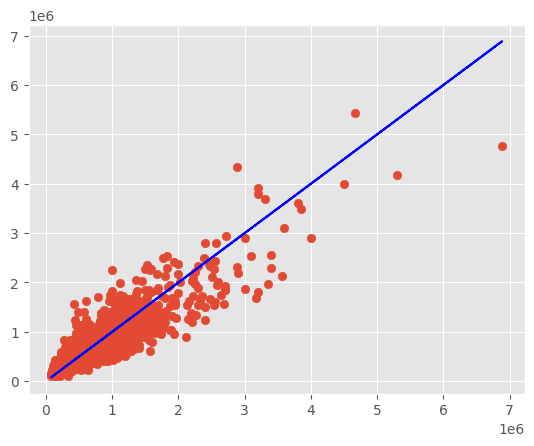

In [104]:
plt.scatter(x=y_test, y=predictions)
plt.plot(y_test, y_test, 'b')
plt.show()

#### Prediction on custom data

In [106]:
single_house = df.drop('price', axis=1).iloc[0]
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [110]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [111]:
model.predict(single_house)

1/1 [==============================] - 0s 43ms/step


array([[285861.66]], dtype=float32)

In [112]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
